In [ ]:
import tensorflow as tf

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.0


In [ ]:
from tensorflow.keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Displaying an image

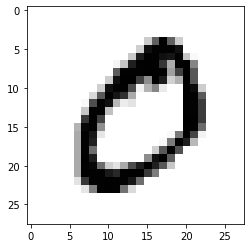

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(xtrain[1],cmap = 'binary')
plt.show()

### One Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical
ytrain_encoded = to_categorical(ytrain)
ytest_encoded = to_categorical(ytest)

##Preprocessing



In [ ]:
import numpy as np
x_train_reshaped = np.reshape(xtrain, (60000, 784))
x_test_reshaped = np.reshape(xtest, (10000,784))
print(x_train_reshaped.shape)

(60000, 784)


### Data Normalization

In [ ]:
xmean = np.mean(x_train_reshaped)
xstd = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - xmean) / (xstd + epsilon)
x_test_norm = (x_test_reshaped - xmean) / (xstd + epsilon)

#Model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu',input_shape=(784,)),
    Dense(128, activation ='relu'),
    Dense(10,activation='softmax')
    ])

In [ ]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#Training

In [ ]:
model.fit(x_train_norm, ytrain_encoded,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3690 - accuracy: 0.8913
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1852 - accuracy: 0.9461
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1418 - accuracy: 0.9582
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1159 - accuracy: 0.9662
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0982 - accuracy: 0.9717


### Evaluating the Model

In [ ]:
loss,accuracy = model.evaluate(x_test_norm,ytest_encoded)

313/313 [==============================] - 1s 1ms/step - loss: 0.1050 - accuracy: 0.9689


#Predictions


In [ ]:
preds = model.predict(x_test_norm)

### Plotting the Results

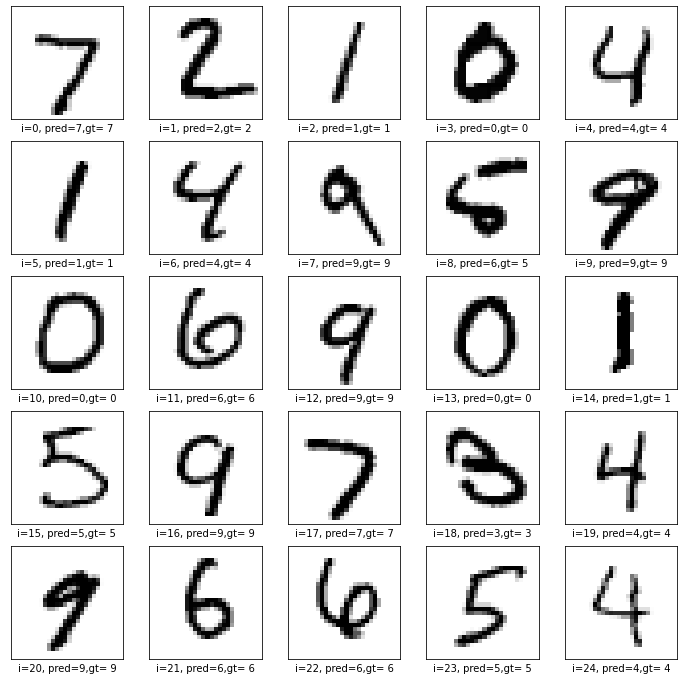

In [ ]:
plt.figure(figsize=(12,12))
start_index = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index+i])
    gt = ytest[start_index+i]
    
    col = 'g'
    if pred != gt:
        col = 'r'
    plt.xlabel('i={}, pred={},gt= {}'.format(start_index+i,pred,gt))
    plt.imshow(xtest[start_index+i], cmap='binary')
plt.show()